# Artificial Neural Networks

## Classification

### Data

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(42)
np.random.seed(42)
%matplotlib inline

In [517]:
from sklearn.datasets import load_iris
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

In [518]:
dataset[:9].style

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000
5,5.400000,3.900000,1.700000,0.400000
6,4.600000,3.400000,1.400000,0.300000
7,5.000000,3.400000,1.500000,0.200000
8,4.400000,2.900000,1.400000,0.200000


In [519]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, iris.target, stratify=iris.target, random_state=42)

In [520]:
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


### Scikit-Learn

In [521]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=42, max_iter=1000)
ann.fit(x_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [539]:
print(ann.activation, ann.learning_rate, ann.hidden_layer_sizes)

relu constant 5000


In [523]:
predicted = ann.predict(x_test)

In [524]:
from utility.utility import compare_class
compare_class(predicted, y_test)

-------------------------------------------------------
| pr\lb  |   2    |   1    |   0    | total  |  acc   |
-------------------------------------------------------
|   2    |   13   |   0    |   0    |   13   |  1.0   |
-------------------------------------------------------
|   1    |   0    |   13   |   0    |   13   |
----------------------------------------------
| total  |   13   |   13   |   38   |
-------------------------------------


### PyTorch

In [525]:
import torch
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [526]:
x_train = torch.from_numpy(x_train.to_numpy()).to(device)
x_test = torch.from_numpy(x_test.to_numpy()).to(device)
y_train = torch.from_numpy(y_train).to(device)
y_test = torch.from_numpy(y_test)

In [527]:
input_size = x_train.shape[1]
hidden_layer_size = 100
output_size = 4
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_layer_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer_size, output_size)
)
model.double().to(device)

Sequential(
  (0): Linear(in_features=4, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=4, bias=True)
)

In [528]:
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [529]:
for i in range(1000):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (i, loss.item()), end='\r')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [530]:
predicted = model(x_test).cpu().max(1).indices
compare_class(predicted, y_test)

-------------------------------------------------------
| pr\lb  |   2    |   1    |   0    | total  |  acc   |
-------------------------------------------------------
|   2    |   13   |   0    |   0    |   13   |  1.0   |
-------------------------------------------------------
|   1    |   0    |   13   |   0    |   13   |
----------------------------------------------
| total  |   13   |   13   |   38   |
-------------------------------------


## Regression

### Data

torch.Size([1000, 1]) torch.Size([1000, 1])


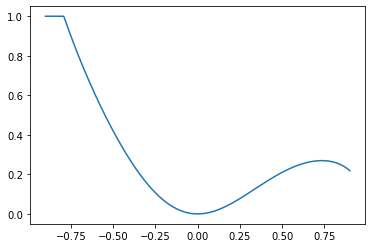

In [531]:
def f_target(x):
    return torch.max(torch.min((torch.acos(x) * x.pow(2) / (1+torch.tanh(x**2))),
                               torch.scalar_tensor(1)),
                     torch.scalar_tensor(0))
X = torch.unsqueeze(torch.linspace(-0.9, 0.9, 1000), dim=1) 
y = f_target(X)
print(X.shape, y.shape)
plt.plot(X, y)

### Scikit-Learn

In [532]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(max_iter=1000, hidden_layer_sizes=5000)
ann.fit(X, y.reshape(-1))
y_pred = ann.predict(X)

In [533]:
print(ann.activation, ann.learning_rate, ann.hidden_layer_sizes)

relu constant 5000


(-1.0, 1.0, 0.0, 1.0)

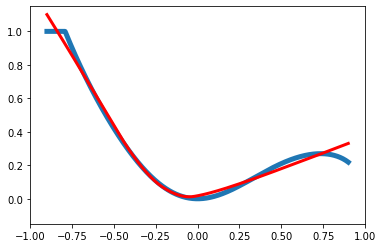

In [534]:
plt.plot(X, y, lw=5)
plt.plot(X, y_pred, c='red', lw=3)
plt.axis('equal')
plt.axis(np.array((-1, 1, 0, 1)))

### PyTorch

In [535]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
input_size = 1
hidden_layer_size = 100
output_size = 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_layer_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer_size, output_size)
)
model.to(device)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [536]:
criterion = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [537]:
X = X.to(device)
y = y.to(device)
for i in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (i, loss.item()), end='\r')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

(-1.0, 1.0, 0.0, 1.0)

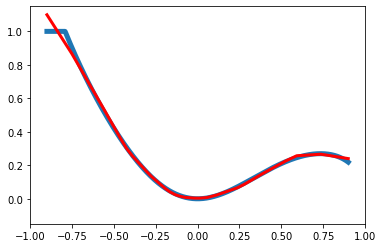

In [538]:
plt.plot(X.cpu().detach(), y.cpu().detach(), lw=5)
plt.plot(X.cpu().detach(), y_pred.cpu().detach(), c='red', lw=3)
plt.axis('equal')
plt.axis(np.array((-1, 1, 0, 1)))